In [17]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager
matplotlib.font_manager._rebuild()
matplotlib.rcParams['font.family'] = ['Heiti TC']
import seaborn as sns
from scipy import stats
import numpy as np


In [2]:
%reload_ext autoreload
%autoreload 2
%aimport Scripts

from Scripts.dangerousDriving import bloodAlcoholDistribution as baDis
from Scripts.utils import util

In [101]:
pd.set_option('display.max_colwidth', 1000)

## Load national and Xinjinag Data

In [112]:
national = pd.read_csv('./dataframes/dangerousDriving/nationalDD.csv')

In [113]:
xinjiang = pd.read_csv('./dataframes/dangerousDriving/xinjiangDD.csv')

## Blood Alcohol Content distribution

### National

In [152]:
nationalResults, NNnote, NNnoMatchCount, NNmultipleMatchesCount, NNparseNumErrorCount, NNfirstHalfMatchCount = baDis.extractAlcoholNumber(national)



In [157]:
print('len nationalResults: {}'.format(len(nationalResults)))
print('national noMatchCount: {}'.format(NNnoMatchCount))
print('national multipleMatchesCount: {}'.format(NNmultipleMatchesCount))
print('national parseNumErrorCount: {}'.format(NNparseNumErrorCount))
print('national firstHalfMatchCount: {}'.format(NNfirstHalfMatchCount))

print('total national DD rows: {}'.format(len(national))) 

len nationalResults: 265231
national noMatchCount: 6175
national multipleMatchesCount: 38957
national parseNumErrorCount: 490
national firstHalfMatchCount: 26832
total national DD rows: 265231


In [158]:
national['bloodAlcoholContent'] = nationalResults
national['baNotes'] = NNnote

In [263]:
# national.to_csv('./dataframes/dangerousDriving/nationalDDWithBAcontent.csv', index=False)

In [161]:
noMatch = national[national["baNotes"]=='noMatch']

In [187]:
noMatch.sample()[['fact', 'lawArticle', 'moneyPunishment', 'imprisonment']]

,fact,lawArticle,moneyPunishment,imprisonment
61775,五家渠垦区人检察院指控，2014年8月20日23时30分许，被告人杨某某在五家渠市酒后驾驶车辆自人民南路由南向北行驶，与相对方向的三轮小货车相撞，致车上的人员受伤，车辆受损，经五家渠交通警察大队认定，被告人杨某某负此事故的主要责任。经鉴定，被告人杨某某的血液检测出乙醇，每一百毫升血液中含乙醇一百二十三毫克。公诉机关认为被告人杨某某的行为构成××，并向本院提交了相关证据，提请本院依法惩处。,133,0,2


In [212]:
allMatches = national[~national.baNotes.eq('parseError') & ~national.baNotes.eq('noMatch')]

In [213]:
len(allMatches)

258566

In [159]:
baHalfMatch = national[national["baNotes"]=='firstHalfMatch']

In [160]:
len(baHalfMatch)

26737

In [214]:
nationalResults99 = util.getPercentileList(allMatches['bloodAlcoholContent'].tolist(), 99)


Text(0.5, 1.0, '99 Percentail National Dangerous Driving Blood Alcohol Content Distribution ( if present)')

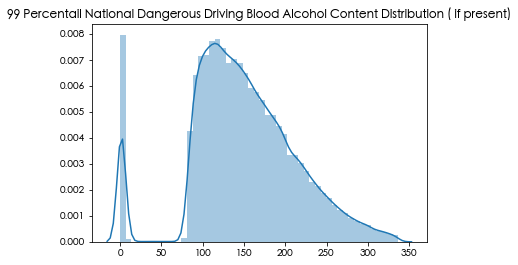

In [261]:
sns.distplot(nationalResults99)
plt.title('99 Percentail National Dangerous Driving Blood Alcohol Content Distribution ( if present)')


In [216]:
matchedNotDrunkcontent = allMatches[allMatches['bloodAlcoholContent']< 20]

In [217]:
len(matchedNotDrunkcontent)

13928

In [227]:
matchedNotDrunkcontent.sample()[['fact', 'lawArticle', 'moneyPunishment', 'imprisonment']]

,fact,lawArticle,moneyPunishment,imprisonment
130682,公诉机关指控，2015年9月10日20时30分许，被告人赵某某酒后驾驶牌号为沪CTXXXX小型轿车行驶至上海市嘉定区百安路、嘉安公路口北约80米处，被民警查获。经检验，其血液中乙醇含量为1.85毫克／毫升，达到醉酒程度。赵某某到案后如实供述了犯罪事实。公诉机关认为赵某某具有如实供述的处罚情节，建议判处赵某某二个月以上三个月以下××并处罚金，可适用××。,133,2000,2


In [219]:
matchedDrunkDriving =  allMatches[allMatches['bloodAlcoholContent']>= 20]

In [220]:
len(matchedDrunkDriving)

244638

### National - What's up with the no blood alcohol content matches cases

National has 6175/265231 (2.3%) cases cannot match blood alcohol content

(1) What types are these cases if not drunk driving?

In [236]:
noMatch.sample()[['fact', 'lawArticle', 'moneyPunishment', 'imprisonment']]

,fact,lawArticle,moneyPunishment,imprisonment
227847,宁夏回族自治区灵武市人民检察院指控，被告人王某某无视道路交通安全，醉酒后在道路上驾驶机动车辆，其行为已触犯《中华人民共和国刑法》××××××第（二）项之规定，犯罪事实清楚，证据确实充分，应当以××追究其刑事责任。被告人王某某归案后，如实供述自己的犯罪事实，适用《中华人民共和国刑法》××××之规定，可以从轻处罚。\r\n适用的证据有：户籍证明；证人证言；血醇检验鉴定意见书；被告人供述等证据。,133,3000,1


### Xinjiang

In [242]:
xinjiangResults, XJnote, XJnoMatchCount, XJmultipleMatchesCount, XJparseNumErrorCount, XJfirstHalfMatchCount = baDis.extractAlcoholNumber(xinjiang)


In [243]:
print('len xinjiangResults: {}'.format(len(xinjiangResults)))
print('Xinjiang noMatchCount: {}'.format(XJnoMatchCount))
print('Xinjiang multipleMatchesCount: {}'.format(XJmultipleMatchesCount))
print('Xinjiang parseNumErrorCount: {}'.format(XJparseNumErrorCount))
print('Xinjiang firstHalfMatchCount: {}'.format(XJfirstHalfMatchCount))

print('total Xinjiang DD rows: {}'.format(len(xinjiang))) 


len xinjiangResults: 2703
Xinjiang noMatchCount: 33
Xinjiang multipleMatchesCount: 140
Xinjiang parseNumErrorCount: 4
Xinjiang firstHalfMatchCount: 845
total Xinjiang DD rows: 2703


In [245]:
xinjiang['bloodAlcoholContent'] = xinjiangResults
xinjiang['baNotes'] = XJnote

In [264]:
# xinjiang.to_csv('./dataframes/dangerousDriving/xinjiangDDWithBAcontent.csv', index=False)

In [246]:
XJallMatches = xinjiang[~xinjiang.baNotes.eq('parseError') & ~xinjiang.baNotes.eq('noMatch')]


In [247]:
len(XJallMatches) # (len(XJallMatches) + parseNumErrorCount + noMatchCount) should = total Xinjiang DD rows

2666

In [249]:
xinjiangResults99 = util.getPercentileList(XJallMatches['bloodAlcoholContent'].tolist(), 99)


Text(0.5, 1.0, '99 Percentail Xinjiang Dangerous Driving Blood Alcohol Content Distribution ( if present)')

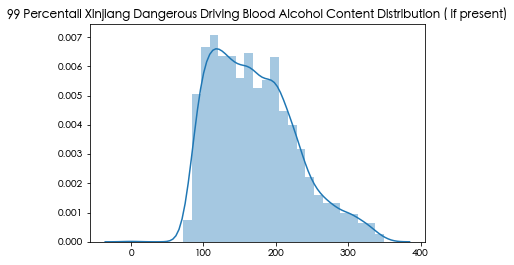

In [262]:
sns.distplot(xinjiangResults99)
plt.title('99 Percentail Xinjiang Dangerous Driving Blood Alcohol Content Distribution ( if present)')


In [251]:
XJmatchedNotDrunkcontent = XJallMatches[XJallMatches['bloodAlcoholContent']< 20]
XJmatchedDrunkDriving =  XJallMatches[XJallMatches['bloodAlcoholContent']>= 20]

In [252]:
print('len XJ not drunk driving: {}'.format(len(XJmatchedNotDrunkcontent)))
print('len XJ drunk driving: {}'.format(len(XJmatchedDrunkDriving)))

len XJ not drunk driving: 1
len XJ drunk driving: 2665


In [254]:
XJmatchedNotDrunkcontent.sample()[['fact', 'lawArticle', 'moneyPunishment', 'imprisonment']]

,fact,lawArticle,moneyPunishment,imprisonment
2295,公诉机关指控，2017年5月9日8时40分许，被告人郝某酒后驾驶无牌号两轮摩托车，沿省道318线由北向南行驶至福海县工大桥路段时，被福海县公安局人民广场便民警务站执勤民警查获。经阿勒泰市公安局物证鉴定室（阿）公（酒精）鉴（法医）字[2017]F44号血液酒精检验鉴定报告，被告人郝某血液酒精检测结果为l00mg／l00ml。属醉酒驾车。,133,0,2


### Xinjiang - What's up with the no blood alcohol content matches cases

Xinjiang has 33/2703 (1.2%) cases cannot match blood alcohol content

(1) What types are these cases if not drunk driving?

In [258]:
XJnoMatch = xinjiang[xinjiang["baNotes"]=='noMatch']

In [259]:
XJnoMatch[['fact', 'lawArticle', 'moneyPunishment', 'imprisonment']]

,fact,lawArticle,moneyPunishment,imprisonment
0,公诉机关起诉指控：\r\n被告单位宁波保税区鲁塑贸易有限公司在被告人鲁某甲授意及实施下，在无实际货物交易的情况下，以支付票面价税合计金额5%-5.5%作为开票费，从新疆天一化轻有限责任公司、乌鲁木齐鼎鑫祥泰商贸有限公司、乌鲁木齐市聚源丰商贸有限公司、新疆汇巨能石油化工有限公司、乌鲁木齐长景伟业工贸有限公司、克拉玛依市独山子区方汇商贸有限公司、乌鲁木齐福顺骏达石油化工有限公司等7家企业处购得虚开的增值税专用发票共计404份，价税合计金额56116790元，其中税额8153721.63元，均已抵扣。\r\n被告单位宁波保税区鲁塑贸易有限公司为牟取非法利益，在被告人鲁某甲授意及实施下，在无实际货物交易的情况下，采取按票面价税合计收取6%-7%开票费的手段，向宁波科程电器制造有限公司、余姚百利达机械制造厂等11家企业虚开增值税专用发票共计51份，价税合计4451550元，税额646806.41元，其中598530.76元已抵扣。\r\n为证明以上事实，公诉机关向法庭提供了被告人供述、证人证言及抵扣证明等相应的证据。公诉机关认为被告单位宁波保税区鲁塑贸易有限公司及被告人鲁某甲的行为已构成虚开增值税专用发票罪，现提请本院依法予以判处。\r\n被告单位宁波保税区鲁塑贸易有限公司及诉讼代表人对起诉指控的罪名和犯罪事实均未表异议。,205,2000,132
46,公诉机关指控，2017年10月4日18时13分许，被告人常某醉酒后驾驶新A9***8（临时牌照新A7***3号）灰色英伦牌小型轿车由南向北行驶至乌鲁木齐市南湖南路西三巷路段时被执勤民警查获。经血液检测，被告人常某血液中酒精含量为218g/100ml，系醉酒驾驶。,133,8000,4
123,公诉机关指控：2015年1月4日，被告人马某某在吉木乃县宏欣川菜食府与朋友聚餐，聚餐时喝了约100克酒后，于当日16时20分许醉酒驾驶新Ｈ39858号小型轿车由西向东行驶至吉木乃县宏欣川菜食府门口路段处，与正在扫雪的沙某因避让问题发生冲突，至16时22分19秒后将车驶往宏欣川菜食府门口，停车后进入苏某某的超市，与沙某某、苏某某发生争执。三、四分钟后，苏某某于16时27分08秒拨打110报警电话。被吉木乃县公安局巡逻防控大队民警查获。经抽取血样，酒精含量为175.9ｍｇ／100ml。公诉机关认为，被告人马某某违反交通管理法规，醉酒驾驶机动车在道路上行驶，其行为已触犯《中华人民共和国刑法》××××的规定，应以××追究其刑事责任。,133,0,3
606,阿克苏市人民检察院指控，2017年6月10日14时10分许，被告人田某和朋友在阿克苏市韶山酒楼吃饭期间饮酒。次日0时11分许，田某驾驶×××号车行驶至阿克苏市红桥前路段时被执勤民警查获。经检测，被告人田某静脉血液中酒精含量为112g/100ml，属醉酒驾驶行为。,133,0,1
614,五家渠垦区人检察院指控，2014年8月20日23时30分许，被告人杨某某在五家渠市酒后驾驶车辆自人民南路由南向北行驶，与相对方向的三轮小货车相撞，致车上的人员受伤，车辆受损，经五家渠交通警察大队认定，被告人杨某某负此事故的主要责任。经鉴定，被告人杨某某的血液检测出乙醇，每一百毫升血液中含乙醇一百二十三毫克。公诉机关认为被告人杨某某的行为构成××，并向本院提交了相关证据，提请本院依法惩处。,133,0,2
702,伊宁市人民检察院指控，2016年7月7日23时01分，被告人李某忠醉酒后无驾驶资格驾驶×××号灰色大众牌小型轿车，在伊宁市新西环路由北向南行驶至天马转盘汽车之家前路段时，被民警查获。经伊犁州公安局物证鉴定所鉴定，在送检李某忠的血液中检出乙醇成分，乙醇含量为128.7g/100ml。,133,0,3
715,伊宁市人民检察院指控，2015年6月7日23时59分许，被告人张某醉酒后驾驶牌照号为新AXXXXX轿车行驶至伊宁市创业路交汇处路段时，在例行安全检查中被执勤民警当场查获。经鉴定，案发时，被告人张某血液中酒精含量为147.21ml／100ml，属醉酒驾车。,133,0,2
933,博乐市人民检察院指控，2014年5月23日22时10分许，被告人孙某醉酒驾驶新E-73228号两轮摩托车，沿博乐市文化路由南向北行驶至锦绣小区A区西门路段时，被博乐市公安局交警大队执勤民警所查获。\r\n针对上述指控，公诉机关当庭宣读并出示了书证、证人证言、被告人供述及辩解、鉴定意见等证据。\r\n公诉机关认为，被告人孙某违反交通运输管理法规，醉酒驾驶车辆，其行为触犯了我国刑律，构成××，提请本院依照《中华人民共和国刑法》××××规定追究其刑事责任。,133,0,2
1001,公诉机关指控：2014年11月9日，被告人刘1某和朋友在奇台县西地镇一度假村内吃饭期间饮酒。当时23时左右，被告人刘1某驾驶×××号小型轿车由西向东行驶至东地村十字路口附近时，与由东向西行驶的周某驾驶的×××号小型客车相撞，造成两车受损的交通事故。后刘1某驾车逃离现场又将车驶入路基，被周某等人抓住。经奇台县公安局交通警察大队认定，被告人刘1某负事故的全部责任。\r\n被告人刘1某归案后能如实供述自己的犯罪事实。\r\n公诉机关认为：被告人刘1某醉酒后驾驶机动车上道路行驶发生交通事故，并负事故全部责任，其行已触犯《中华人民共和国刑法》××××××第（二）项的规定，犯罪事实清楚，证据确实充分，应当以××追究其刑事责任。被告人刘1某醉酒驾驶机动车后发生交通事故，且负事故全部责任，并在造成交通事故后逃逸，尚未构成其他犯罪，应从重处罚；被告人刘1某无驾驶资格驾驶机动车，应从重处罚；被告人刘1某归案后能够如实供述自己的罪行，属坦白，可以从轻处罚。建议判处被告人刘1某××至四个月，并处罚金。,133,7000,3
1081,阿图什市人民检察院指控，2014年4月30日19时10分，被告人李某某驾驶的新P58xxx号普通二轮摩托车，在阿图什市帕米尔东路60院由北向南驶出帕米尔路时，与在帕米尔路由东向西行驶的古某某某驾驶的无号牌轻便二轮摩托车挂撞，造成双方车辆不同程度受损的道路交通事故。公诉机关认为，被告人李某某的行为触犯了《中华人民共和国刑法》××××××的规定，构成××，提请本院依法判处。,133,2000,2
